In [1]:
from plot_utils import *

# The sync reluctant algorithm

## Empirics

In [2]:
"""
df_sync_rel = pd.concat([load_df('sync-rel-vary-h-a100-cycle-small' ,pre_loaded=False),
                           load_df('sync-rel-vary-h-a100-cycle' ,pre_loaded=False)])

# load cycles
g = df_sync_rel[np.isclose(df_sync_rel.h,2.3846153846153846)]
g  = g[g.n ==1000]
for n, a in g.groupby('n'):
    a = a[~a.c.isna()]
    log_bins = np.logspace(np.log10(a.c.min()), np.log10(a.c.max()), 20)
    print(a.c.min(),a.c.max())
    np.save(CLEAN_DIR / f'cycle_hist_syncrel_{n=}', a.c.values)

# load cycle histogram
df_sync_rel['not_converged'] =  df_sync_rel.transient==10000
df_sync_rel['c1'] =  df_sync_rel.c==1
df_sync_rel['c2'] =  df_sync_rel.c==2
df_sync_rel['clarge'] =  df_sync_rel.c.fillna(-1)>2
df_sync_rel_mean = df_sync_rel.groupby(['n','h']).mean().reset_index()
df_sync_rel_median = df_sync_rel.groupby(['n','h']).median().reset_index()
df_sync_rel = df_sync_rel_mean
df_sync_rel.to_csv(CLEAN_DIR / 'df_sync_rel.csv',index=None)
df_sync_rel_median.to_csv(CLEAN_DIR / 'df_sync_rel_median.csv',index=None)
"""

log_bins = np.logspace(np.log10(2), np.log10(5220), 20)
df_sync_rel_median = pd.read_csv(CLEAN_DIR / 'df_sync_rel_median.csv')
df_sync_rel = pd.read_csv(CLEAN_DIR / 'df_sync_rel.csv')

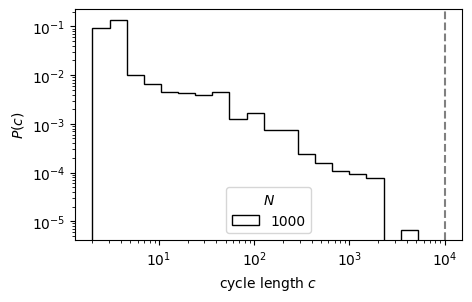

In [3]:
fig, ax = plt.subplots(figsize=(width,height))
n=1000
ax.hist(np.load(CLEAN_DIR / f'cycle_hist_syncrel_{n=}.npy'),histtype='step',bins=log_bins,label=n,density=True,color='black')
ax.legend(title='$N$')
ax.set_xlabel('cycle length $c$')
ax.set_ylabel('$P(c)$')
ax.set_xscale('log')
ax.axvline(10000,c='grey',linestyle='dashed')
ax.set_yscale('log')
plt.savefig(save_dir / 'Fig_AX_cycle_histogram.png',dpi=300,bbox_inches='tight')

/tmp/ipykernel_3796505/1895849556.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('GnBu')


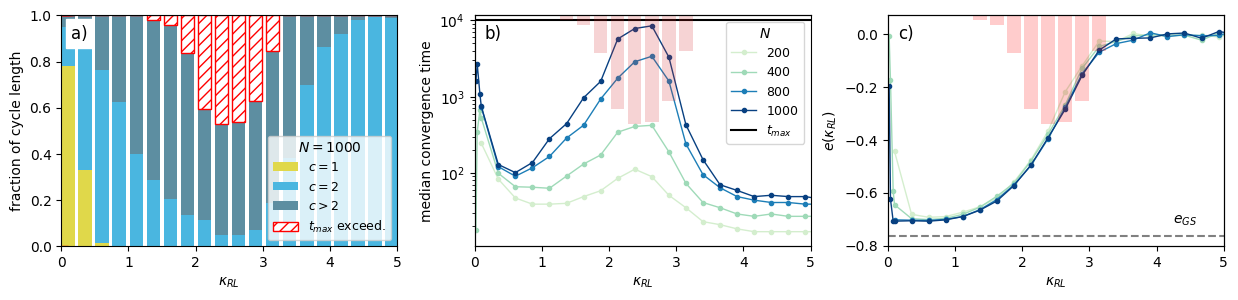

In [4]:
fig, axes = plt.subplots(1,3,figsize=(3*width,1*height))

cmap = plt.cm.get_cmap('GnBu')
norm = Normalize(vmin=0, vmax=1000)

#### energy
ax = axes[2]
ax_twin = ax.twinx()
for n, g in df_sync_rel.groupby('n'):
    g1 = g.groupby('h').mean().reset_index()
    ax.plot(g1.h, g1.energy,lw=1,color=cmap(norm(n)),marker='.')
    if n == 1000:
        g2 = g.groupby('h').mean().reset_index()
        ax_twin.bar(g2.h,g2.not_converged,bottom=g2.c1+g2.c2+g2.clarge,color=color_noconv,alpha=0.2,width=0.2)
   
plot_GS(ax,nolabel=True)
ax.set_xlim(0,5)
ax.set_xlabel('$\kappa_{RL}$')
ax.set_ylabel('$e(\kappa_{RL})$')
ax_twin.set_ylim(0,1)
ax.text(0.85, 0.1, '$e_{GS}$', fontsize=10, transform=ax.transAxes)
ax_twin.tick_params(axis='y', which='both', left=False, right=False, labelleft=False, labelright=False)


#### transient
ax = axes[1]
ax_twin = ax.twinx()

ncv_color = 'tab:red'
for n, g in df_sync_rel_median.groupby('n'):
    g1 = g.groupby('h').median().reset_index()
    ax.plot(g1.h, g1.transient, label=f'${n}$',lw=1,color=cmap(norm(n)),marker='.')

for n, g in df_sync_rel.groupby('n'):
    if n != 1000:
        continue
    g2 = g.groupby('h').mean().reset_index()
    ax_twin.bar(g2.h,g2.not_converged,bottom=g2.c1+g2.c2+g2.clarge,color=ncv_color,alpha=0.2,width=0.2)
    
ax.set_yscale('log')
ax.axhline(10000,label='$t_{max}$',c='black')
ax.legend(title='$N$',fontsize=legend_fontsize)
ax.set_xlim(0,5)
ax.set_xlabel('$\kappa_{RL}$')
ax.set_ylabel('median convergence time')
ax_twin.set_ylim(0,1)
ax_twin.spines['right'].set_visible(False)
ax_twin.tick_params(axis='y', which='both', left=False, right=False, labelleft=False, labelright=False)

#### cycle lengths

ax = axes[0]

for n, g in df_sync_rel.groupby('n'):
    if n != 1000:
        continue
    g2 = g.groupby('h').mean().reset_index()
    ax.bar(g2.h,g2.c1,color=color_c1,width=0.2)
    ax.bar(g2.h,g2.c2,bottom=g2.c1,color=color_c2,width=0.2)
    ax.bar(g2.h,g2.clarge,bottom=g2.c1+g2.c2,color=color_clarge,width=0.2)
    ax.bar(g2.h,g2.not_converged,bottom=g2.c1+g2.c2+g2.clarge,width=0.2,color='white', edgecolor=color_noconv,hatch='///')

ax.bar([0],[0],color=color_c1,width=0.2,label='$c=1$')    
ax.bar([0],[0],color=color_c2,width=0.2,label='$c=2$')   
ax.bar([0],[0],color=color_clarge,width=0.2,label='$c>2$')  
ax.bar([0],[0],width=0.2,color='white', edgecolor=color_noconv,hatch='///',label='$t_{max}$ exceed.')    
ax.legend(title='$N=1000$',fontsize=legend_fontsize)
ax.set_xlim(0,5)
ax.set_xlabel('$\kappa_{RL}$')
ax.set_ylabel('fraction of cycle length')
plt.subplots_adjust(wspace=0.23)
axes[0].text(0.03, 0.9, f'a)', fontsize=12, transform=axes[0].transAxes,backgroundcolor='white',alpha=1.0)
axes[1].text(0.03, 0.9, f'b)', fontsize=12, transform=axes[1].transAxes)
axes[2].text(0.03, 0.9, f'c)', fontsize=12, transform=axes[2].transAxes)
plt.savefig(save_dir / 'Fig_6_empirics_SYNC_RL_overview.png',dpi=300,bbox_inches='tight')

## DMFT

In [5]:
df = pd.read_csv('results/theory/fd_rl_energy.csv')

In [6]:
df = pd.read_csv('results/theory/fd_rl_energy.csv')
res = []
for i, row in df.iterrows():
    for p, e in enumerate(ast.literal_eval(row.energy.replace('NaN','-1'))):
        res.append({'krl': row.krl,'energy':e,'p':p})
df_theory_forward_dcm = pd.DataFrame(res).sort_values(by='krl')

df_theory_forward_dcm.replace(-1,np.nan,inplace=True)
df_theory_back_dcm = pd.read_csv('results/theory/bk_rl_energy.csv')

res = []
for i, row in df_theory_back_dcm.iterrows():
    for p, (ent,kap) in enumerate(zip(ast.literal_eval(row.energy.replace('NaN','-1')),ast.literal_eval(row.krl.replace('Inf','-1')))):
        res.append({'p': row.p, 'c':row.c,'kappa':kap,'energy_end':ent})
df_theory_back_dcm_energy = pd.DataFrame(res)

df_theory_back_dcm = pd.read_csv('results/theory/bk_rl_entropy.csv')
res = []
for i, row in df_theory_back_dcm.iterrows():
    for p, (ent,kap) in enumerate(zip(ast.literal_eval(row.norm_entropy.replace('NaN','-1')),ast.literal_eval(row.krl.replace('Inf','-1')))):
        res.append({'p': row.p, 'c':row.c,'kappa':kap,'entropy_norm':ent})
df_theory_back_dcm_ent = pd.DataFrame(res)

In [7]:
max_krl = 5.02
min_krl = 0.0
df_theory_back_dcm_ent = df_theory_back_dcm_ent[np.logical_and(df_theory_back_dcm_ent.kappa < max_krl,df_theory_back_dcm_ent.kappa > 0.0)]
df_theory_back_dcm_energy = df_theory_back_dcm_energy[np.logical_and(df_theory_back_dcm_energy.kappa < max_krl,df_theory_back_dcm_energy.kappa > 0.0)]
df_theory_forward_dcm = df_theory_forward_dcm[np.logical_and(df_theory_forward_dcm.krl < max_krl,df_theory_forward_dcm.krl > 0.0)]


In [8]:
shown_t= colors_fwd.keys()

In [9]:
df_rel_empiric_dcm = load_df('sync-rel-vary-first-t-1000-2' ,pre_loaded=False) # change to -2
df_rel_empiric_dcm = df_rel_empiric_dcm[df_rel_empiric_dcm.n == 4000]
for t in shown_t:
    df_rel_empiric_dcm[f'{t}_eng'] = df_rel_empiric_dcm.energy_trajectory.apply(lambda x: x[-1] if t >= len(x) else x[t])
df_rel_empiric_dcm = df_rel_empiric_dcm.groupby('h').mean().reset_index()
df_rel_empiric_dcm.to_csv(CLEAN_DIR / 'df_rel_empiric_dcm.csv',index=None)

df_rel_empiric_dcm = pd.read_csv(CLEAN_DIR / 'df_rel_empiric_dcm.csv')

Loading raw results


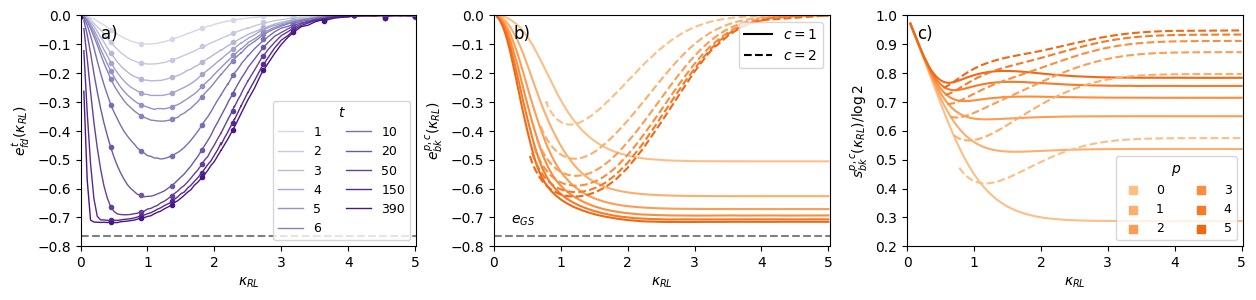

In [10]:
fig, axes = plt.subplots(1,3,figsize=(3*width,1*height))

#### energy f

ax = axes[0]


# plot first k steps
k = 10

    
for p, g in df_theory_forward_dcm.groupby('p'):
    if p not in colors_fwd.keys() or p == 0 or p==7:
        continue
    ax.plot(g.krl,-g.energy,label=p,lw=1,color=colors_fwd[p])
    
    ax.scatter(df_rel_empiric_dcm.h, df_rel_empiric_dcm[f'{p}_eng'],color=colors_fwd[p],marker='.')
    
y = []
x = []
    
plot_GS(ax,nolabel=True)
ax.set_xlabel('$\kappa_{RL}$')
ax.legend(title=p_forward,fontsize=legend_fontsize, ncol=2,loc='lower right')
ax.set_ylabel('$e_{fd}^t(\kappa_{RL})$')
ax.set_ylim(-0.8,0.0)
ax.set_xlim(0,max_krl)


#### energy b
ax = axes[1]
for (c,p), g in df_theory_back_dcm_energy.groupby(['c','p']):
    ax.plot(g.kappa,g.energy_end,color=colors_bwd[p],linestyle='dashed' if c == 2 else 'solid')
t_select = 5
ax.set_xlabel('$\kappa_{RL}$')
ax.set_ylabel('$e_{bk}^{p,c}(\kappa_{RL})$')
ax.set_xlim(0,max_krl)
ax.set_ylim(-0.8,0.0)
plot_GS(ax,nolabel=True)
ax.plot([],[],  color='black',label='$c=1$')
ax.plot([],[],  color='black',linestyle='dashed',label='$c=2$')
ax.legend(loc='upper right')

#### entropy b

ax = axes[2]
n=100

for (c,p), g in df_theory_back_dcm_ent.groupby(['c','p']):
    
    ax.plot(g.kappa,g.entropy_norm,color=colors_bwd[p],linestyle='dashed' if c == 2 else 'solid')

for t,c in reversed(colors_bwd.items()):
    if t > 5:
            continue
    ax.scatter([],[],color=c,label=t,marker='s',s=30)
    
ax.legend(title=p_backward,fontsize=legend_fontsize, ncol=2)
ax.set_xlabel('$\kappa_{RL}$')
ax.set_ylabel('$s_{bk}^{p,c}(\kappa_{RL})/\log 2$')
ax.set_xlim(0,max_krl)
ax.set_ylim(0.2,1.0)
plt.subplots_adjust(wspace=0.23)
axes[1].text(0.05, 0.1, '$e_{GS}$', fontsize=10, transform=axes[1].transAxes)

axes[0].text(0.06, 0.9, f'a)', fontsize=12, transform=axes[0].transAxes)#,backgroundcolor='white',alpha=1.0)
axes[1].text(0.06, 0.9, f'b)', fontsize=12, transform=axes[1].transAxes)
axes[2].text(0.03, 0.9, f'c)', fontsize=12, transform=axes[2].transAxes)
plt.savefig(save_dir / 'Fig_7_DMFT_SYNC_RL_overview.png',dpi=300,bbox_inches='tight')